## Getting Started

Let's load the data set, have a look and do the Exploratory Data Analysis (EDA).

In [1]:
# import packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math

# suppress warnings
import warnings
warnings.filterwarnings('ignore')

sns.set()

In [2]:
# load the data
data = pd.read_csv('data/train.csv')

In [3]:
# size of the data set
data.shape

(1677, 35)

In [4]:
# first look
data.head()

,id,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EnvironmentSatisfaction,...,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition
0,0,36,Travel_Frequently,599,Research & Development,24,3,Medical,1,4,...,80,1,10,2,3,10,0,7,8,0
1,1,35,Travel_Rarely,921,Sales,8,3,Other,1,1,...,80,1,4,3,3,4,2,0,3,0
2,2,32,Travel_Rarely,718,Sales,26,3,Marketing,1,3,...,80,2,4,3,3,3,2,1,2,0
3,3,38,Travel_Rarely,1488,Research & Development,2,3,Medical,1,3,...,80,0,15,1,1,6,0,0,2,0
4,4,50,Travel_Rarely,1017,Research & Development,5,4,Medical,1,2,...,80,0,31,0,3,31,14,4,10,1


In [5]:
# have a look at the columns/features
data.columns

Index(['id', 'Age', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EnvironmentSatisfaction', 'Gender', 'HourlyRate', 'JobInvolvement',
       'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus',
       'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'Over18',
       'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager', 'Attrition'],
      dtype='object')

In [6]:
# find out how many values are missing per column
missing = pd.DataFrame(data.isnull().sum(), columns=["Amount"])
missing['Percentage'] = round((missing['Amount']/data.shape[0])*100, 2)
missing

,Amount,Percentage
id,0,0.0
Age,0,0.0
BusinessTravel,0,0.0
DailyRate,0,0.0
Department,0,0.0
DistanceFromHome,0,0.0
Education,0,0.0
EducationField,0,0.0
EmployeeCount,0,0.0
EnvironmentSatisfaction,0,0.0


Oh wow, no missing values! That's fantastic!

In [7]:
# check how many distinct values we have per column
data.nunique()

id                          1677
Age                           43
BusinessTravel                 3
DailyRate                    625
Department                     3
DistanceFromHome              29
Education                      6
EducationField                 6
EmployeeCount                  1
EnvironmentSatisfaction        4
Gender                         2
HourlyRate                    71
JobInvolvement                 4
JobLevel                       6
JobRole                        9
JobSatisfaction                4
MaritalStatus                  3
MonthlyIncome                895
MonthlyRate                  903
NumCompaniesWorked            10
Over18                         1
OverTime                       2
PercentSalaryHike             15
PerformanceRating              2
RelationshipSatisfaction       4
StandardHours                  1
StockOptionLevel               4
TotalWorkingYears             41
TrainingTimesLastYear          7
WorkLifeBalance                4
YearsAtCom

In [8]:
# check data types
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1677 entries, 0 to 1676
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   id                        1677 non-null   int64 
 1   Age                       1677 non-null   int64 
 2   BusinessTravel            1677 non-null   object
 3   DailyRate                 1677 non-null   int64 
 4   Department                1677 non-null   object
 5   DistanceFromHome          1677 non-null   int64 
 6   Education                 1677 non-null   int64 
 7   EducationField            1677 non-null   object
 8   EmployeeCount             1677 non-null   int64 
 9   EnvironmentSatisfaction   1677 non-null   int64 
 10  Gender                    1677 non-null   object
 11  HourlyRate                1677 non-null   int64 
 12  JobInvolvement            1677 non-null   int64 
 13  JobLevel                  1677 non-null   int64 
 14  JobRole                 

I'm still not sure what each column means. Hopefully I'll find out in the course of the EDA. Then we'll also see what possible values there are in each case.

## EDA

First I want to check the distribution of the later target variable: Attrition. There was no further explanation on Kaggle regarding this variable, but I assume that 1 means yes, 0 means no while yes means that the fact of attrition applies which ultimately means that the employee will leave the company. I will therefore also write "the employee leaves the company" in the explanations in this notebook if the target variable is 1.

### Attrition

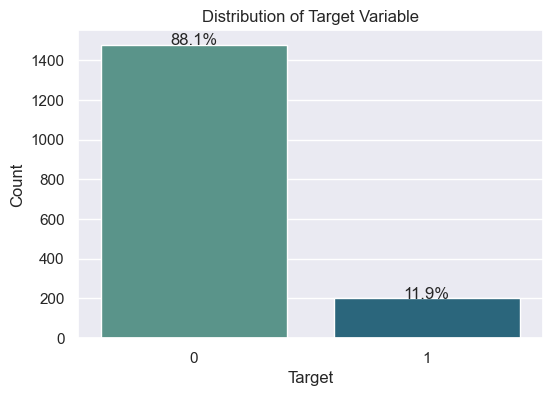

In [9]:
# plot distribution of target variable
plt.figure(figsize=(6, 4))
sns.countplot(x='Attrition', data=data, palette='crest')
total = len(data['Attrition'])
for p in plt.gca().patches:
    height = p.get_height()
    plt.text(p.get_x() + p.get_width() / 2, height + 0.02, f'{height/total:.1%}', ha='center')

plt.title('Distribution of Target Variable')
plt.xlabel('Target')
plt.ylabel('Count')
plt.show()

Only 11,9 % of the employees will leave the company (soon).

Now let's go through all features in the data set and visualize them.

We start with the

### Age

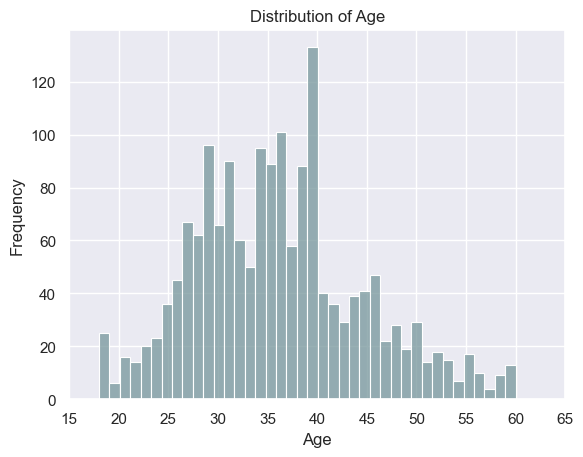

In [10]:
sns.histplot(data['Age'], bins=int(math.sqrt(len(data['Age']))), kde=False, color='#76969b', edgecolor='white')

x_ticks = [15, 20,25,30,35,40,45,50,55,60, 65]
plt.xticks(x_ticks)
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')

plt.show()

### BusinessTravel

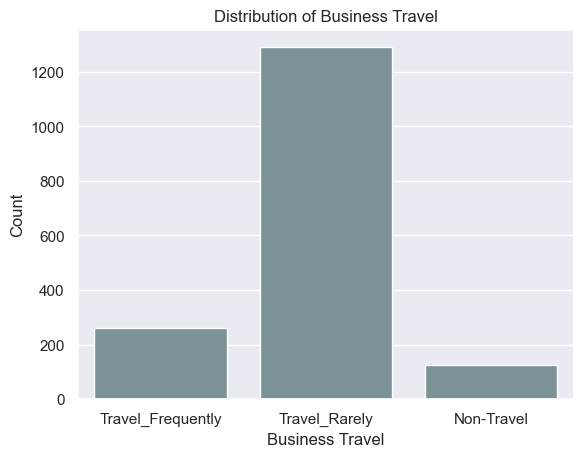

In [11]:
sns.countplot(x='BusinessTravel', data=data, color='#76969b')

plt.title('Distribution of Business Travel')
plt.xlabel('Business Travel')
plt.ylabel('Count')

plt.show()

### DailyRate

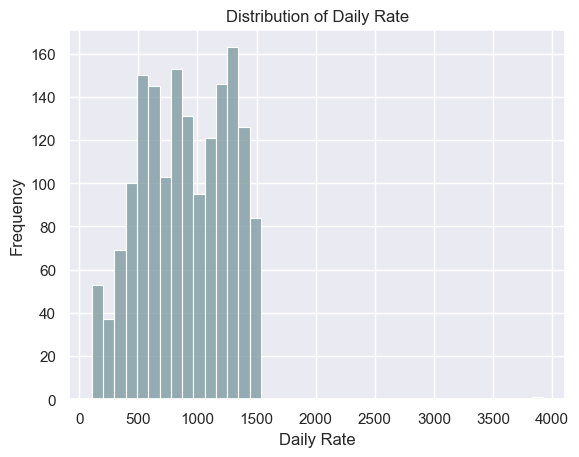

In [12]:
sns.histplot(data['DailyRate'], bins=int(math.sqrt(len(data['Age']))), kde=False, color='#76969b', edgecolor='white')

plt.title('Distribution of Daily Rate')
plt.xlabel('Daily Rate')
plt.ylabel('Frequency')

plt.show()

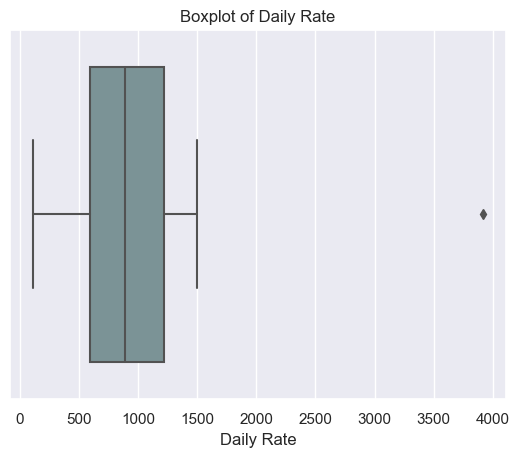

In [13]:
sns.boxplot(x='DailyRate', data=data, color='#76969b')
plt.title('Boxplot of Daily Rate')
plt.xlabel('Daily Rate')
plt.show()